In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_h2_combine-varynoise'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import h2_combine as parent_script

In [12]:
modelexp_nm = 'modelexp_varynoisev2_p2_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['read_len'] == 1, 'read_len'] = 3

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'pace_num', 'threshold', 'min_gt_frequency', 'read_len', 'noise',
       'proposal_type', 'noiserep', 'R2 overall'],
      dtype='object')
(906, 20)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_h2_combine-varynoise/varynoise.pdf ...


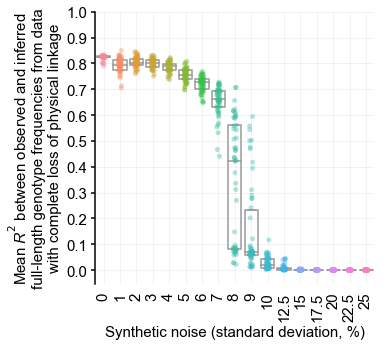

In [13]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (5, 5))

dfs = df[df['read_len'] == 3]
# dfs = dfs[dfs['data_noise'] <= 0.25]

dfs['noise_str'] = dfs['noise']
# dfs['data_noise_str'] = [100*s for s in dfs['data_noise']]

sns.boxplot(
    x = 'noise_str',
    y = 'R2 overall',
    data = dfs,
    color = 'white',
    fliersize = 0,
    ax = ax,
    whis = 0,
)
sns.stripplot(
    x = 'noise_str',
    y = 'R2 overall',
    data = dfs,
    alpha = 0.4,
    ax = ax,
)

sns.despine()
ytick_res = 0.1
plt.yticks(np.arange(0, 1 + ytick_res, ytick_res))
plt.grid(alpha = 0.2)

plt.xlabel('Synthetic noise (standard deviation, %)');
plt.ylabel('Mean $R^2$ between observed and inferred\nfull-length genotype frequencies from data\nwith complete loss of physical linkage');
plt.xticks(rotation = 90);
locs, labels = plt.xticks()
# updated_labels = [f'{100*float(s.get_text()):.1f}' for s in labels]
# plt.xticks(locs, updated_labels)
plt.xticks(locs, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15, 17.5, 20, 22.5, 25])

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'varynoise.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## stats

In [14]:
agg_df = df.groupby('noise')['R2 overall'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats.csv')

,noise,count,mean,std,min,25%,50%,75%,max
0,0.000,53.0,0.823382,0.008559,0.788977,0.823439,0.826393,0.826878,0.833412
1,0.010,53.0,0.793131,0.028189,0.704861,0.775319,0.793924,0.814968,0.849999
2,0.020,53.0,0.806008,0.019928,0.759700,0.794029,0.802479,0.818790,0.845810
3,0.030,54.0,0.800170,0.018484,0.750573,0.787933,0.803192,0.813798,0.831508
4,0.040,53.0,0.785482,0.019636,0.737165,0.773783,0.789055,0.799423,0.822718
5,0.050,53.0,0.755126,0.026822,0.697639,0.737741,0.756296,0.773915,0.808396
6,0.060,54.0,0.719619,0.029148,0.649159,0.701876,0.727819,0.739958,0.768619
7,0.070,53.0,0.652012,0.060365,0.440382,0.630337,0.660409,0.693850,0.727743
8,0.080,53.0,0.343013,0.237086,0.022052,0.083182,0.423435,0.560977,0.706942
9,0.090,54.0,0.153802,0.171019,0.011132,0.057575,0.069611,0.231614,0.594387


## explore

In [9]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,pace_num,threshold,min_gt_frequency,read_len,noise,proposal_type,R2 overall
0,0,0,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.909167,36.0,0.843216,0.188348,0.265045,0.820370,0.915500,0.965899,0.972070,2,5,0,3,0.00,smart,0.826584
1,1,1,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.885207,36.0,0.819715,0.226897,0.108577,0.754397,0.927360,0.968791,0.974579,2,5,0,3,0.01,smart,0.783591
2,2,2,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.902892,36.0,0.857424,0.175655,0.358776,0.844144,0.941232,0.969278,0.975415,2,5,0,3,0.02,smart,0.815214
3,3,3,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.887750,36.0,0.848819,0.197004,0.154225,0.832717,0.923345,0.969902,0.976018,2,5,0,3,0.03,smart,0.788101
4,4,4,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.864211,36.0,0.800117,0.244202,0.058819,0.756342,0.894051,0.968258,0.976798,2,5,0,3,0.04,smart,0.746860


In [11]:
df[df['read_len'] == 3]

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,pace_num,threshold,min_gt_frequency,read_len,noise,proposal_type,R2 overall
0,0,0,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.909167,36.0,0.843216,0.188348,0.265045,0.820370,0.915500,0.965899,0.972070,2,5,0,3,0.000,smart,0.826584
1,1,1,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.885207,36.0,0.819715,0.226897,0.108577,0.754397,0.927360,0.968791,0.974579,2,5,0,3,0.010,smart,0.783591
2,2,2,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.902892,36.0,0.857424,0.175655,0.358776,0.844144,0.941232,0.969278,0.975415,2,5,0,3,0.020,smart,0.815214
3,3,3,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.887750,36.0,0.848819,0.197004,0.154225,0.832717,0.923345,0.969902,0.976018,2,5,0,3,0.030,smart,0.788101
4,4,4,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.864211,36.0,0.800117,0.244202,0.058819,0.756342,0.894051,0.968258,0.976798,2,5,0,3,0.040,smart,0.746860
5,5,5,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.859391,36.0,0.810406,0.183139,0.271102,0.705875,0.867883,0.965345,0.975249,2,5,0,3,0.050,smart,0.738553
6,6,6,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.862312,36.0,0.811538,0.189780,0.235078,0.724753,0.878624,0.962567,0.973126,2,5,0,3,0.060,smart,0.743583
7,7,7,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.830493,36.0,0.779334,0.211818,0.218873,0.650069,0.853644,0.957030,0.970066,2,5,0,3,0.070,smart,0.689718
8,8,8,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.222226,36.0,0.259697,0.260507,0.060897,0.078054,0.101853,0.470362,0.790745,2,5,0,3,0.080,smart,0.049384
9,9,9,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.271538,36.0,0.358598,0.300663,0.046087,0.072891,0.211581,0.656864,0.849563,2,5,0,3,0.090,smart,0.073733
